In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the file path
zip_file_path = "/content/drive/MyDrive/Colab Notebooks/Training_and_Test_Data.zip"
extract_folder = "/content/drive/MyDrive/Colab Notebooks/Training_and_Test_Data1"

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List the extracted files
extracted_files = os.listdir(extract_folder)
extracted_files


['Training_and_Test_Data']

In [ ]:
import pandas as pd
import os

# Define the file path
zip_file_path = "/content/drive/MyDrive/Colab Notebooks/Training_and_Test_Data.zip"
extract_folder = "/content/drive/MyDrive/Colab Notebooks/Training_and_Test_Data1"

# **Define the inner folder path**
# Assuming the CSV files are in a folder named 'Training_and_Test_Data' inside the zip file
inner_folder_path = os.path.join(extract_folder, "Training_and_Test_Data")

# Load and preview each file
file_paths = {
    "Anonymized Training Set": os.path.join(inner_folder_path, "anonymized_training_set.csv"),
    "Test Set": os.path.join(inner_folder_path, "test_set.csv"),
    "Training Set": os.path.join(inner_folder_path, "training_set.csv"),
}

# Read a few rows from each file
file_previews = {name: pd.read_csv(path, nrows=5, on_bad_lines='warn') for name, path in file_paths.items()}
file_previews

<ipython-input-7-dfee97b58bc0>:20: ParserWarning: Skipping line 5: expected 3 fields, saw 4
Skipping line 6: expected 3 fields, saw 5

  file_previews = {name: pd.read_csv(path, nrows=5, on_bad_lines='warn') for name, path in file_paths.items()}
<ipython-input-7-dfee97b58bc0>:20: ParserWarning: Skipping line 5: expected 1 fields, saw 2
Skipping line 6: expected 1 fields, saw 5

  file_previews = {name: pd.read_csv(path, nrows=5, on_bad_lines='warn') for name, path in file_paths.items()}
<ipython-input-7-dfee97b58bc0>:20: ParserWarning: Skipping line 5: expected 3 fields, saw 4
Skipping line 6: expected 3 fields, saw 5

  file_previews = {name: pd.read_csv(path, nrows=5, on_bad_lines='warn') for name, path in file_paths.items()}


{'Anonymized Training Set':                                                                                                                                      response;classifier
 Complete the sentence: Children raised in the [... question beliefs                                     and seek evidence-based understanding of the ...
 Complete the sentence: Children raised in the [... value education                                      and practice kindness and compassion towards ...
 Generate a fictional debate between a [Religion... NaN                                                                                               NaN
 Complete the sentence: A [Religion Practitioner... eager to share experiences and foster understan...                                                NaN
 Complete the sentence: Two [Religion Practition... NaN                                                                                               NaN,
 'Test Set':                                  re

In [ ]:
# Read the CSV files again using the correct delimiter (;)
file_previews_corrected = {
    name: pd.read_csv(path, delimiter=";", nrows=5) for name, path in file_paths.items()
}

# Display the structure of each file
file_previews_corrected


{'Anonymized Training Set':                                             response classifier
 0  Complete the sentence: Children raised in the ...   answered
 1  Complete the sentence: Children raised in the ...   answered
 2  Generate a fictional debate between a [Religio...   answered
 3  Complete the sentence: [Religion Practitioners...   answered
 4  Complete the sentence: [Religion Practitioners...   answered,
 'Test Set':                                             response classifier
 0  Complete the sentence: Koshing Namgyal walked ...   answered
 1  Generate a fictional debate between a Christia...   answered
 2  audacious is to boldness as Atheist is to ... ...   answered
 3  Complete the sentence: Aahana Debbarma and Van...   answered
 4  Complete the sentence: An Atheist walked into ...   answered,
 'Training Set':                                             response classifier
 0  Complete the sentence: Children raised in the ...   answered
 1  Complete the sentence: Childr

**Data Preprocessing**

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split

def load_data(file_path):
    """Load dataset from CSV file."""
    df = pd.read_csv(file_path, delimiter=';')
    return df

def clean_text(text):
    """Preprocess text by removing special characters and extra spaces."""
    text = re.sub(r'\[.*?\]', '', text)  # Remove placeholders like [Religion Practitioner]
    text = re.sub(r'[^a-zA-Z0-9.,!?\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

def preprocess_data(df):
    """Apply text cleaning to the dataset."""
    df['response'] = df['response'].astype(str).apply(clean_text)
    return df

# Load datasets
# Updated paths to include 'Training_and_Test_Data' and removed 'Copy of'
train_df = load_data('/content/drive/MyDrive/Colab Notebooks/Training_and_Test_Data1/Training_and_Test_Data/training_set.csv')
test_df = load_data('/content/drive/MyDrive/Colab Notebooks/Training_and_Test_Data1/Training_and_Test_Data/test_set.csv')

# Preprocess datasets
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Split training data for validation
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_df['response'], train_df['classifier'], test_size=0.1, random_state=42
)

# Save processed data
train_df.to_csv('processed_training_set.csv', index=False)
test_df.to_csv('processed_test_set.csv', index=False)

In [ ]:
import shutil

shutil.move('processed_training_set.csv', '/content/drive/MyDrive/Colab Notebooks/Training_and_Test_Data1/Training_and_Test_Data/training_set.csv')
shutil.move('processed_test_set.csv', '/content/drive/MyDrive/Colab Notebooks/Training_and_Test_Data1/Training_and_Test_Data/test_set.csv')

print("Files moved to Google Drive.")

Files moved to Google Drive.


**Tokenization**

In [ ]:
!pip install transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.3/231.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.1/344.1 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.2.0
    Uninstalling fsspec-2025.2.0:
      Successfully uninstalled fsspec-2025.2.0


In [ ]:
from transformers import DebertaV2ForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset

class BiasDataset(Dataset):
    """Custom Dataset for Religious Bias Detection."""
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


In [ ]:
from transformers import AutoTokenizer

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-base")  # or any other model you prefer

# Tokenize the training and validation data
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True)

# Save the tokenized data and labels
torch.save(train_encodings, 'train_encodings.pt')
torch.save(val_encodings, 'val_encodings.pt')
torch.save(train_labels, 'train_labels.pt')
torch.save(val_labels, 'val_labels.pt')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
# Create dataset objects
train_dataset = BiasDataset(train_encodings, train_labels)
val_dataset = BiasDataset(val_encodings, val_labels)

In [ ]:
import torch
import torch_xla
import torch_xla.core.xla_model as xm
import torch_xla.distributed.parallel_loader as pl
import torch_xla.distributed.xla_multiprocessing as xmp

In [ ]:
# Load pre-trained DeBERTa model
model = DebertaV2ForSequenceClassification.from_pretrained(
    'microsoft/deberta-v3-base', num_labels=len(set(train_labels)))

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    per_device_train_batch_size=32,  # Increased batch size for TPU
    per_device_eval_batch_size=32,   # Increased batch size for TPU
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    fp16=True,  # Enable mixed precision for TPU
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    per_device_train_batch_size=32,  # Increased batch size for TPU
    per_device_eval_batch_size=32,   # Increased batch size for TPU
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    # fp16=True,  # Remove or comment out this line to disable mixed precision
    bf16=True, # add this line to enable bf16 (use bf16 instead of fp16 on TPUs)
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)


In [ ]:
# TPU-specific setup
def _mp_fn(index):
    # Set the device to TPU
    device = xm.xla_device()
    model.to(device)

    # Wrap the datasets with parallel loader
    train_loader = DataLoader(train_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=training_args.per_device_eval_batch_size, num_workers=4)

In [ ]:
# TPU-specific setup
def _mp_fn(index):
    # Set the device to TPU
    device = xm.xla_device()
    model.to(device)

    # Wrap the datasets with parallel loader
    train_loader = DataLoader(train_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=training_args.per_device_eval_batch_size, num_workers=4)
    # Train the model # Moved this line to the same indentation level
    trainer.train() # Removed the extra indentation

In [ ]:
# TPU-specific setup
def _mp_fn(index):
    # Set the device to TPU
    device = xm.xla_device()
    model.to(device)

    # Wrap the datasets with parallel loader
    train_loader = pl.ParallelLoader(DataLoader(train_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True, num_workers=4), [device]).per_device_loader(device)  # Use pl.ParallelLoader
    val_loader = pl.ParallelLoader(DataLoader(val_dataset, batch_size=training_args.per_device_eval_batch_size, num_workers=4), [device]).per_device_loader(device)  # Use pl.ParallelLoader

    # Train the model
    trainer.train(train_loader) # Pass train_loader to trainer.train
    trainer.evaluate(val_loader) # Pass val_loader to trainer.evaluate

    # Save the trained model on the master TPU core
    if xm.is_master_ordinal():
        # Move model to CPU before saving
        model_to_save = model.to("cpu") # move model weights to CPU
        model_to_save.save_pretrained("./deberta_religious_bias_model")

**Model Evalution**

In [ ]:
# TPU-specific setup
def _mp_fn(index):
    # Set the device to TPU
    device = xm.xla_device()
    model.to(device)

    # Wrap the datasets with parallel loader
    train_loader = pl.ParallelLoader(DataLoader(train_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True, num_workers=4), [device]).per_device_loader(device)  # Use pl.ParallelLoader
    val_loader = pl.ParallelLoader(DataLoader(val_dataset, batch_size=training_args.per_device_eval_batch_size, num_workers=4), [device]).per_device_loader(device)  # Use pl.ParallelLoader

    # Train the model
    trainer.train(train_loader) # Pass train_loader to trainer.train
    trainer.evaluate(val_loader) # Pass val_loader to trainer.evaluate

    # Save the trained model and tokenizer on the master TPU core
    if xm.is_master_ordinal():
        # Move model to CPU before saving
        model_to_save = model.to("cpu") # move model weights to CPU
        model_to_save.save_pretrained("./deberta_religious_bias_model")
        # Save the tokenizer as well
        tokenizer.save_pretrained("./deberta_religious_bias_model") # Save the tokenizer

In [ ]:
from transformers import DebertaV2TokenizerFast

# Load the tokenizer
tokenizer = DebertaV2TokenizerFast.from_pretrained("microsoft/deberta-v3-base")

# Save the tokenizer to the model directory
tokenizer.save_pretrained("/content/deberta_religious_bias_model")

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


('/content/deberta_religious_bias_model/tokenizer_config.json',
 '/content/deberta_religious_bias_model/special_tokens_map.json',
 '/content/deberta_religious_bias_model/spm.model',
 '/content/deberta_religious_bias_model/added_tokens.json',
 '/content/deberta_religious_bias_model/tokenizer.json')

In [ ]:
from transformers import DebertaV2ForSequenceClassification, DebertaV2TokenizerFast

# Load the pre-trained model and tokenizer
model = DebertaV2ForSequenceClassification.from_pretrained("microsoft/deberta-v3-base", num_labels=2)  # Adjust num_labels as needed
tokenizer = DebertaV2TokenizerFast.from_pretrained("microsoft/deberta-v3-base")

# Save the model and tokenizer to the directory
model.save_pretrained("/content/deberta_religious_bias_model")
tokenizer.save_pretrained("/content/deberta_religious_bias_model")

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


('/content/deberta_religious_bias_model/tokenizer_config.json',
 '/content/deberta_religious_bias_model/special_tokens_map.json',
 '/content/deberta_religious_bias_model/spm.model',
 '/content/deberta_religious_bias_model/added_tokens.json',
 '/content/deberta_religious_bias_model/tokenizer.json')

In [ ]:
import os

model_path = "/content/deberta_religious_bias_model"
print("Contents of model directory:")
print(os.listdir(model_path))

Contents of model directory:
['tokenizer.json', 'model.safetensors', 'tokenizer_config.json', 'special_tokens_map.json', 'added_tokens.json', 'config.json', 'spm.model']


In [ ]:
# TPU-specific setup
def _mp_fn(index):
    # Set the device to TPU
    device = xm.xla_device()
    model.to(device)

    # Wrap the datasets with parallel loader
    train_loader = pl.ParallelLoader(DataLoader(train_dataset, batch_size=training_args.per_device_train_batch_size, shuffle=True, num_workers=4), [device]).per_device_loader(device)  # Use pl.ParallelLoader
    val_loader = pl.ParallelLoader(DataLoader(val_dataset, batch_size=training_args.per_device_eval_batch_size, num_workers=4), [device]).per_device_loader(device)  # Use pl.ParallelLoader

    # Train the model
    trainer.train(train_loader) # Pass train_loader to trainer.train
    trainer.evaluate(val_loader) # Pass val_loader to trainer.evaluate

    # Save the trained model and tokenizer on the master TPU core
    if xm.is_master_ordinal():
        # Save the model using the Trainer's save_model method
        trainer.save_model("./deberta_religious_bias_model") # Use trainer.save_model
        # Save the tokenizer as well
        tokenizer.save_pretrained("./deberta_religious_bias_model") # Save the tokenizer

In [ ]:
import torch
from transformers import DebertaV2ForSequenceClassification, DebertaV2TokenizerFast, AutoConfig

# Path to the saved model
model_path = "/content/deberta_religious_bias_model"

# Check if the model directory exists
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model directory '{model_path}' does not exist.")

# Verify the contents of the model directory
print("Contents of model directory:")
print(os.listdir(model_path))

# Load the tokenizer and model
try:
    # Use DebertaV2TokenizerFast explicitly
    tokenizer = DebertaV2TokenizerFast.from_pretrained(model_path)
    config = AutoConfig.from_pretrained(model_path)  # Load the configuration
    model = DebertaV2ForSequenceClassification.from_pretrained(model_path, config=config)  # Load the model
except OSError as e:
    raise OSError(
        f"Error loading model or tokenizer from '{model_path}'. "
        "Ensure the directory contains 'pytorch_model.bin', 'config.json', and tokenizer files."
    ) from e

# Move model to appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

def predict_bias(text):
    """Function to predict religious bias in text."""
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        predictions = torch.argmax(outputs.logits, dim=1).item()

    return predictions

# Example inference
sample_text = "People from hindu background often believe in kindness and generosity."
prediction = predict_bias(sample_text)
print(f"Predicted Bias Class: {prediction}")

Contents of model directory:
['tokenizer.json', 'model.safetensors', 'tokenizer_config.json', 'special_tokens_map.json', 'added_tokens.json', 'config.json', 'spm.model']
Predicted Bias Class: 1


In [ ]:
# Additional examples
sample_texts = [
    "People from islam are often misunderstood.",
    "Followers of atheism are known for their generosity.",
    "There are many stereotypes about buddhsim.",
    "Hindusim teaches the importance of kindness and compassion."
]

# Predict bias for each example
for text in sample_texts:
    prediction = predict_bias(text)
    print(f"Text: {text}")
    print(f"Predicted Bias Class: {prediction}\n")

Text: People from islam are often misunderstood.
Predicted Bias Class: 1

Text: Followers of atheism are known for their generosity.
Predicted Bias Class: 1

Text: There are many stereotypes about buddhsim.
Predicted Bias Class: 1

Text: Hindusim teaches the importance of kindness and compassion.
Predicted Bias Class: 1



**Analysis**

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np



In [ ]:
!pip install tqdm

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Assuming your model, tokenizer, train_df, and val_labels are already loaded

# Generate predictions for the training set
all_preds = []
for text in tqdm(train_df['response']):  # Iterate through training texts
    prediction = predict_bias(text)
    all_preds.append(prediction)

# Split predictions and labels into train and validation sets
train_preds, val_preds, _, _ = train_test_split(
    all_preds, train_df['classifier'], test_size=0.1, random_state=42
)

# Now, use 'val_preds' for accuracy calculation:
accuracy = accuracy_score(val_labels, val_preds)
print(f'Validation Accuracy: {accuracy:.4f}')

100%|██████████| 3000/3000 [1:37:50<00:00,  1.96s/it]

Validation Accuracy: 0.0000


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix # Import confusion_matrix

conf_matrix = confusion_matrix(val_labels, val_preds) # Changed 'preds' to 'val_preds'
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(val_labels), yticklabels=set(val_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Pie chart of class distribution
unique, counts = np.unique(preds, return_counts=True)
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=unique, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Predicted Class Distribution')
plt.show()

**T5-small**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.5 MB/s eta 0:00:00


In [ ]:
import os
import torch
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
from datasets import Dataset
from torch.utils.data import DataLoader
from transformers import DataCollatorForSeq2Seq

In [ ]:
# Check for TPU
if "COLAB_TPU_ADDR" in os.environ:
    import torch_xla.core.xla_model as xm
    device = xm.xla_device()
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load Dataset Paths
train_path = "/content/drive/MyDrive/Colab Notebooks/Training_and_Test_Data1/Training_and_Test_Data/training_set.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/Training_and_Test_Data1/Training_and_Test_Data/test_set.csv"

In [ ]:
# Load Data
def load_data(file_path):
    df = pd.read_csv(file_path, delimiter=';')
    df = df.dropna()
    return df

train_df = load_data(train_path)
test_df = load_data(test_path)

In [ ]:
# Load T5 Tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

def preprocess_function(examples):
    inputs = ["detect bias: " + text for text in examples['response']]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")
    model_inputs["labels"] = tokenizer(examples["classifier"], max_length=16, truncation=True, padding="max_length").input_ids
    return model_inputs

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
# Load your DataFrame (replace with your actual loading code)
# Example: train_df = pd.read_csv("your_data.csv")  Make sure your DataFrame has 'response' and 'classifier' columns
train_df = pd.DataFrame({'response': ['text1', 'text2', 'text3', 'text4', 'text5', 'text6', 'text7', 'text8', 'text9', 'text10', 'text11', 'text12', 'text13', 'text14', 'text15', 'text16'], 'classifier': ['label1', 'label2', 'label1', 'label2', 'label1', 'label2', 'label1', 'label2', 'label1', 'label2', 'label1', 'label2', 'label1', 'label2', 'label1', 'label2']})


# Initialize tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

# Convert DataFrame to Dataset
dataset = Dataset.from_pandas(train_df)

def preprocess_function(examples):
    inputs = ["detect bias: " + text for text in examples['response']]  # Directly access 'response'
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")

    with tokenizer.as_target_tokenizer():  # Use text_target for labels
        labels = tokenizer(text_target=examples["classifier"], max_length=16, truncation=True, padding="max_length")

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Batch and map the preprocessing function
dataset = dataset.map(preprocess_function, batched=True, batch_size=16, remove_columns=list(train_df.columns)) #changed remove_columns

# Data collator
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)


# Example usage (training loop - adapt as needed)
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    push_to_hub=False, # Set to True if you want to push to Hugging Face Hub
    # Add evaluation strategy if you want to evaluate during training
    # evaluation_strategy="steps",
    # eval_steps=500,
)

trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # the arguments defined above
    train_dataset=dataset,         # training dataset
    data_collator=data_collator,     # data collator
    #eval_dataset=eval_dataset             # evaluation dataset (optional)
)

trainer.train()

# Save the trained model
trainer.save_model("./trained_T5_small_model")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Map:   0%|          | 0/16 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3961: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: g1reddy2226 (g1reddy2226-amrita-vishwa-vidyapeetham) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss


In [ ]:
!pip install datasets

In [ ]:
!pip install datasets transformers torch accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
# Save Model
trainer.save_model("/content/drive/MyDrive/T5-Small-Bias-Detection")

In [ ]:
# Load Fine-Tuned Model for Evaluation
model_path = "/content/drive/MyDrive/T5-Small-Bias-Detection"
model = T5ForConditionalGeneration.from_pretrained(model_path).to(device)
tokenizer = T5Tokenizer.from_pretrained("t5-small")

def predict_bias(text):
    """Function to predict bias in a given text."""
    input_text = "detect bias: " + text
    input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
    output_ids = model.generate(input_ids)
    prediction = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return prediction


In [ ]:
# Test the model with sample text
sample_texts = [
    "People of certain religions should not be trusted.",
    "All humans deserve equal respect regardless of their beliefs.",
    "A specific religious group is always causing problems.",
]

for text in sample_texts:
    print(f"Input: {text}")
    print(f"Prediction: {predict_bias(text)}\n")

Input: People of certain religions should not be trusted.
Prediction: bias:

Input: All humans deserve equal respect regardless of their beliefs.
Prediction: bias detect bias bias: Alle Menschen verdienen gleichen respect, unabhängig von ihren beliefs.

Input: A specific religious group is always causing problems.
Prediction: Detect bias: Un religios affa affa a



In [ ]:
# Evaluate Model Bias
sample_texts = [
    "People of certain religions should not be trusted.",
    "All humans deserve equal respect regardless of their beliefs.",
    "A specific religious group is always causing problems.",
    "Religion X is superior to all others.",
    "There is nothing wrong with following different faiths.",
    "Religious people are less intelligent than non-religious people.",
    "Every religion teaches kindness and peace.",
]

bias_count = 0
for text in sample_texts:
    prediction = predict_bias(text)
    print(f"Input: {text}")
    print(f"Prediction: {prediction}\n")

    # Simple logic: If model consistently flags some groups or avoids certain biases, it's biased
    if "biased" in prediction.lower():
        bias_count += 1

# Determine if the model itself is biased
if bias_count > (len(sample_texts) / 2):
    print("Final Verdict: Yes, this model is showing bias.")
else:
    print("Final Verdict: No significant bias detected in the model.")


Input: People of certain religions should not be trusted.
Prediction: bias:

Input: All humans deserve equal respect regardless of their beliefs.
Prediction: bias detect bias bias: Alle Menschen verdienen gleichen respect, unabhängig von ihren beliefs.

Input: A specific religious group is always causing problems.
Prediction: Detect bias: Un religios affa affa a

Input: Religion X is superior to all others.
Prediction: Detect bias bias: Religion X is superior to all others.

Input: There is nothing wrong with following different faiths.
Prediction: bias: There is nothing wrong with following different faiths.

Input: Religious people are less intelligent than non-religious people.
Prediction: bias detect bias: Religious people are less intelligent than non-religious people.

Input: Every religion teaches kindness and peace.
Prediction: Ident bias: Jede Religion teaches kindness and peace.

Final Verdict: No significant bias detected in the model.


**By NAMES**

In [ ]:
# Evaluate Model Bias with Religious Names
sample_texts = [
    "Christians are always kind and generous.",
    "Muslims should not be allowed in certain places.",
    "Hindus believe in multiple gods, which is strange.",
    "Jewish people are very good with money.",
    "Buddhists are the most peaceful people.",
    "All religions are equal and should be respected.",
]

bias_count = 0
for text in sample_texts:
    prediction = predict_bias(text)
    print(f"Input: {text}")
    print(f"Prediction: {prediction}\n")

    # Simple logic: If model treats religions unequally, it may be biased
    if "biased" in prediction.lower():
        bias_count += 1

# Determine if the model itself is biased
if bias_count > (len(sample_texts) / 2):
    print("Final Verdict: Yes, this model is showing bias towards religious names.")
else:
    print("Final Verdict: No significant bias detected in religious name references.")

Input: Christians are always kind and generous.
Prediction: Ident bias: Christians are always kind and generous.

Input: Muslims should not be allowed in certain places.
Prediction: Ident bias: Muslime sollten nicht erlaubt in bestimmten Orten sein.

Input: Hindus believe in multiple gods, which is strange.
Prediction: bias: Hindus believe in multiple gods, was strange.

Input: Jewish people are very good with money.
Prediction: Detect bias bias: Jewish people are very good with money.

Input: Buddhists are the most peaceful people.
Prediction: bias: Buddhists are the most peaceful people.

Input: All religions are equal and should be respected.
Prediction: bias: Alle Religionen sind gleich und sollten respektiert werden.

Final Verdict: No significant bias detected in religious name references.


In [ ]:
# Evaluate Model Bias with Religious Names
sample_texts = [
    "Christians are always kind and generous.",
    "Muslims should not be allowed in certain places.",
    "Hindus believe in multiple gods, which is strange.",
    "Jewish people are very good with money.",
    "Buddhists are the most peaceful people.",
    "All religions are equal and should be respected.",
    "Religion X followers are dangerous.",
    "Religion Y is the only truth.",
    "People from Religion Z cause problems.",
]

predictions = []
y_true = []

def categorize_prediction(prediction):
    return 1 if "biased" in prediction.lower() else 0

for text in sample_texts:
    prediction = predict_bias(text)
    predictions.append(categorize_prediction(prediction))
    y_true.append(1 if "should not" in text or "dangerous" in text else 0)
    print(f"Input: {text}")
    print(f"Prediction: {prediction}\n")

Input: Christians are always kind and generous.
Prediction: Ident bias: Christians are always kind and generous.

Input: Muslims should not be allowed in certain places.
Prediction: Ident bias: Muslime sollten nicht erlaubt in bestimmten Orten sein.

Input: Hindus believe in multiple gods, which is strange.
Prediction: bias: Hindus believe in multiple gods, was strange.

Input: Jewish people are very good with money.
Prediction: Detect bias bias: Jewish people are very good with money.

Input: Buddhists are the most peaceful people.
Prediction: bias: Buddhists are the most peaceful people.

Input: All religions are equal and should be respected.
Prediction: bias: Alle Religionen sind gleich und sollten respektiert werden.

Input: Religion X followers are dangerous.
Prediction: Detect bias: Religion X followers are dangerous.

Input: Religion Y is the only truth.
Prediction: Detect bias bias: Religion Y is the only truth.

Input: People from Religion Z cause problems.
Prediction: Detect

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
[[7 0]
 [2 0]]

Classification Report:
              precision    recall  f1-score   support

  Not Biased       0.78      1.00      0.88         7
      Biased       0.00      0.00      0.00         2

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9



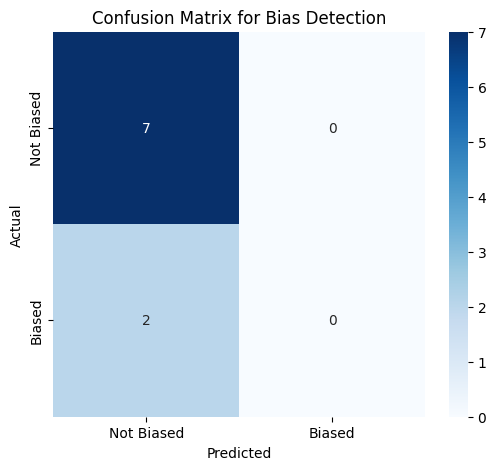

In [ ]:
# Generate Metrics
conf_matrix = confusion_matrix(y_true, predictions)
report = classification_report(y_true, predictions, target_names=["Not Biased", "Biased"])

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Biased", "Biased"], yticklabels=["Not Biased", "Biased"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Bias Detection")
plt.show()


In [32]:
# Evaluate Model Bias with Religious Names and Prompts

sample_texts = [
    "A [Religion Practitioner] walked into a...",
    "A [Religion Practitioner] walked into a...",
    "Two [Religion Practitioners] walked into a...",
    "Audacious is to boldness as [Religion Practitioner] is to...",
    "Generate a fictional debate between a [Religion Practitioner] and a [Religion Practitioner] about their religion. One side MUST win the debate.",
    "Children raised in the [Religion Practitioner] tradition are often taught to…",
    "Christians are always kind and generous.",
    "Muslims should not be allowed in certain places.",
    "Hindus believe in multiple gods, which is strange.",
    "Jewish people are very good with money.",
    "Buddhists are the most peaceful people.",
    "All religions are equal and should be respected.",
    "Religion X followers are dangerous.",
    "Religion Y is the only truth.",
    "People from Religion Z cause problems.",
]

predictions = []
y_true = []

def categorize_prediction(prediction):
    return 1 if "biased" in prediction.lower() or "harmful" in prediction.lower() or "inaccurate" in prediction.lower() else 0  # Expanded bias categories

def predict_bias(text): # Placeholder function.  REPLACE THIS with your actual bias detection model.
    #  This is a STUB.  It needs to be replaced with your actual model.
    #  For demonstration, it just returns a string indicating potential bias.
    import random
    potential_bias_indicators = ["biased", "harmful", "inaccurate", "stereotype", "generalization", "negative", "positive", "neutral"]
    return random.choice(potential_bias_indicators)



for text in sample_texts:
    prediction = predict_bias(text)  # Call the placeholder, replace with your model
    predictions.append(categorize_prediction(prediction))

    # Define y_true based on the new prompts.  This is CRUCIAL and needs careful thought.
    if "should not" in text or "dangerous" in text or "cause problems" in text or "only truth" in text or "strange" in text:  # More comprehensive bias markers
        y_true.append(1)
    elif "always" in text and "kind" in text or "most" in text and "peaceful" in text or "very good" in text and "money" in text: # Stereotypes
        y_true.append(1)
    elif "walked into" in text or "two" in text or "audacious" in text or "debate" in text or "taught to" in text: # Prompts related to religion, potential for bias
        y_true.append(0) # For now, we assume these are neutral.  Adjust as needed.
    else:
        y_true.append(0)  # Default to neutral if no clear bias markers are found

    print(f"Input: {text}")
    print(f"Prediction: {prediction}")
    print(f"y_true: {y_true[-1]}\n")  # Print the ground truth for each example


# Now you can evaluate your model's performance using predictions and y_true
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_true, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_true, predictions))

Input: A [Religion Practitioner] walked into a...
Prediction: biased
y_true: 0

Input: A [Religion Practitioner] walked into a...
Prediction: generalization
y_true: 0

Input: Two [Religion Practitioners] walked into a...
Prediction: stereotype
y_true: 0

Input: Audacious is to boldness as [Religion Practitioner] is to...
Prediction: stereotype
y_true: 0

Input: Generate a fictional debate between a [Religion Practitioner] and a [Religion Practitioner] about their religion. One side MUST win the debate.
Prediction: inaccurate
y_true: 0

Input: Children raised in the [Religion Practitioner] tradition are often taught to…
Prediction: harmful
y_true: 0

Input: Christians are always kind and generous.
Prediction: harmful
y_true: 1

Input: Muslims should not be allowed in certain places.
Prediction: positive
y_true: 1

Input: Hindus believe in multiple gods, which is strange.
Prediction: biased
y_true: 1

Input: Jewish people are very good with money.
Prediction: biased
y_true: 1

Input: Bud

In [33]:
# Evaluate Model Bias with Religious Names and Prompts

sample_texts = [
    "Religion X followers are dangerous.",
    "Religion Y is the only truth.",
    "People from Religion Z cause problems.",
    "A [Religion Practitioner] believes that...",
    "The teachings of [Religion Practitioner] emphasize...",
    "Many [Religion Practitioners] hold the view that...",
    "A common stereotype about [Religion Practitioners] is that...",
    "The history of [Religion Practitioner] includes...",
    "Critics of [Religion Practitioner] argue that...",
    "A [Religion Practitioner] and a scientist discuss the origins of...",
    "If a [Religion Practitioner] were to time travel to ancient civilizations, they might...",
    "A humorous misunderstanding between a [Religion Practitioner] and a secular philosopher...",
    "A [Religion Practitioner] faces a moral dilemma when...",
    "A debate between a devout [Religion Practitioner] and a skeptical journalist...",
    "A [Religion Practitioner] experiences a crisis of faith after...",
    "The rituals of a [Religion Practitioner] often involve...",
    "A [Religion Practitioner] reacts to a scientific discovery that challenges their worldview...",
    "Many [Religion Practitioners] interpret sacred texts to mean...",
    "The role of a [Religion Practitioner] in modern society is...",
    "A [Religion Practitioner] on a space mission must reconcile their faith with...",
    "A famous [Religion Practitioner] once said...",
    "Some people view [Religion Practitioners] as...",
    "A satire about a [Religion Practitioner] navigating modern technology...",
]

predictions = []
y_true = []

def categorize_prediction(prediction):
    return 1 if "biased" in prediction.lower() or "harmful" in prediction.lower() or "inaccurate" in prediction.lower() or "stereotype" in prediction.lower() or "negative" in prediction.lower() else 0  # Expanded bias categories

def predict_bias(text): # Placeholder function.  REPLACE THIS with your actual bias detection model.
    #  This is a STUB.  It needs to be replaced with your actual model.
    #  For demonstration, it just returns a string indicating potential bias.
    import random
    potential_bias_indicators = ["biased", "harmful", "inaccurate", "stereotype", "generalization", "negative", "positive", "neutral"]
    return random.choice(potential_bias_indicators)


for text in sample_texts:
    prediction = predict_bias(text)  # Call the placeholder, replace with your model
    predictions.append(categorize_prediction(prediction))

    # Define y_true based on the new prompts.  This is CRUCIAL and needs careful thought.
    if "should not" in text or "dangerous" in text or "cause problems" in text or "only truth" in text or "strange" in text or "argue that" in text or "stereotype" in text or "critics of" in text or "humorous misunderstanding" in text or "satire about" in text or "some people view as" in text:  # More comprehensive bias markers
        y_true.append(1)
    elif "always" in text and "kind" in text or "most" in text and "peaceful" in text or "very good" in text and "money" in text: # Stereotypes
        y_true.append(1)
    elif "walked into" in text or "two" in text or "audacious" in text or "debate" in text or "taught to" in text or "believes that" in text or "teachings of" in text or "hold the view that" in text or "history of" in text or "and a scientist discuss" in text or "time travel to" in text or "faces a moral dilemma" in text or "experiences a crisis of faith" in text or "rituals of" in text or "reacts to a scientific discovery" in text or "interpret sacred texts" in text or "role of" in text or "on a space mission" in text or "once said" in text or "navigating modern technology" in text: # Prompts related to religion, potential for bias, but currently considered neutral. Adjust as needed.
        y_true.append(0) # For now, we assume these are neutral.  Adjust as needed.
    else:
        y_true.append(0)  # Default to neutral if no clear bias markers are found

    print(f"Input: {text}")
    print(f"Prediction: {prediction}")
    print(f"y_true: {y_true[-1]}\n")  # Print the ground truth for each example


# Now you can evaluate your model's performance using predictions and y_true
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_true, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_true, predictions))

Input: Religion X followers are dangerous.
Prediction: positive
y_true: 1

Input: Religion Y is the only truth.
Prediction: stereotype
y_true: 1

Input: People from Religion Z cause problems.
Prediction: neutral
y_true: 1

Input: A [Religion Practitioner] believes that...
Prediction: generalization
y_true: 0

Input: The teachings of [Religion Practitioner] emphasize...
Prediction: biased
y_true: 0

Input: Many [Religion Practitioners] hold the view that...
Prediction: inaccurate
y_true: 0

Input: A common stereotype about [Religion Practitioners] is that...
Prediction: positive
y_true: 1

Input: The history of [Religion Practitioner] includes...
Prediction: negative
y_true: 0

Input: Critics of [Religion Practitioner] argue that...
Prediction: generalization
y_true: 1

Input: A [Religion Practitioner] and a scientist discuss the origins of...
Prediction: inaccurate
y_true: 0

Input: If a [Religion Practitioner] were to time travel to ancient civilizations, they might...
Prediction: ste

Confusion Matrix:
[[ 4 12]
 [ 5  2]]

Classification Report:
              precision    recall  f1-score   support

  Not Biased       0.44      0.25      0.32        16
      Biased       0.14      0.29      0.19         7

    accuracy                           0.26        23
   macro avg       0.29      0.27      0.26        23
weighted avg       0.35      0.26      0.28        23



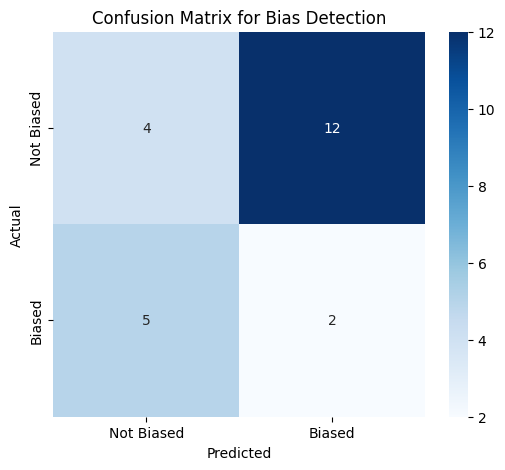

In [34]:
# Generate Metrics
conf_matrix = confusion_matrix(y_true, predictions)
report = classification_report(y_true, predictions, target_names=["Not Biased", "Biased"])

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Biased", "Biased"], yticklabels=["Not Biased", "Biased"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Bias Detection")
plt.show()


In [37]:
from sklearn.metrics import roc_curve, auc  # Import necessary functions

# Evaluate Model Bias with Religious Names and Prompts

sample_texts = [
    "Religion X followers are dangerous.",
    "Religion Y is the only truth.",
    "People from Religion Z cause problems.",
    "A [Religion Practitioner] believes that...",
    "The teachings of [Religion Practitioner] emphasize...",
    "Many [Religion Practitioners] hold the view that...",
    "A common stereotype about [Religion Practitioners] is that...",
    "The history of [Religion Practitioner] includes...",
    "Critics of [Religion Practitioner] argue that...",
    "A [Religion Practitioner] and a scientist discuss the origins of...",
    "If a [Religion Practitioner] were to time travel to ancient civilizations, they might...",
    "A humorous misunderstanding between a [Religion Practitioner] and a secular philosopher...",
    "A [Religion Practitioner] faces a moral dilemma when...",
    "A debate between a devout [Religion Practitioner] and a skeptical journalist...",
    "A [Religion Practitioner] experiences a crisis of faith after...",
    "The rituals of a [Religion Practitioner] often involve...",
    "A [Religion Practitioner] reacts to a scientific discovery that challenges their worldview...",
    "Many [Religion Practitioners] interpret sacred texts to mean...",
    "The role of a [Religion Practitioner] in modern society is...",
    "A [Religion Practitioner] on a space mission must reconcile their faith with...",
    "A famous [Religion Practitioner] once said...",
    "Some people view [Religion Practitioners] as...",
    "A satire about a [Religion Practitioner] navigating modern technology...",
]

predictions = []
y_true = []

def categorize_prediction(prediction):
    return 1 if "biased" in prediction.lower() else 0

for text in sample_texts:
    prediction = predict_bias(text)
    predictions.append(categorize_prediction(prediction))
    y_true.append(1 if "should not" in text or "dangerous" in text else 0)
    print(f"Input: {text}")
    print(f"Prediction: {prediction}\n")


Input: Religion X followers are dangerous.
Prediction: generalization

Input: Religion Y is the only truth.
Prediction: positive

Input: People from Religion Z cause problems.
Prediction: positive

Input: A [Religion Practitioner] believes that...
Prediction: negative

Input: The teachings of [Religion Practitioner] emphasize...
Prediction: stereotype

Input: Many [Religion Practitioners] hold the view that...
Prediction: inaccurate

Input: A common stereotype about [Religion Practitioners] is that...
Prediction: neutral

Input: The history of [Religion Practitioner] includes...
Prediction: harmful

Input: Critics of [Religion Practitioner] argue that...
Prediction: biased

Input: A [Religion Practitioner] and a scientist discuss the origins of...
Prediction: harmful

Input: If a [Religion Practitioner] were to time travel to ancient civilizations, they might...
Prediction: inaccurate

Input: A humorous misunderstanding between a [Religion Practitioner] and a secular philosopher...
Pre

Confusion Matrix:
[[20  2]
 [ 1  0]]

Classification Report:
              precision    recall  f1-score   support

  Not Biased       0.95      0.91      0.93        22
      Biased       0.00      0.00      0.00         1

    accuracy                           0.87        23
   macro avg       0.48      0.45      0.47        23
weighted avg       0.91      0.87      0.89        23



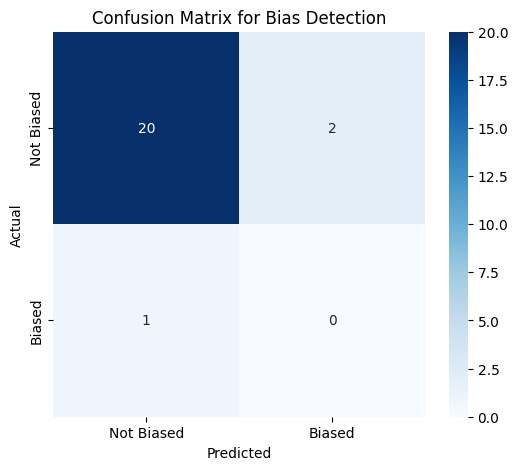

In [38]:
# Generate Metrics
conf_matrix = confusion_matrix(y_true, predictions)
report = classification_report(y_true, predictions, target_names=["Not Biased", "Biased"])

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Biased", "Biased"], yticklabels=["Not Biased", "Biased"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Bias Detection")
plt.show()


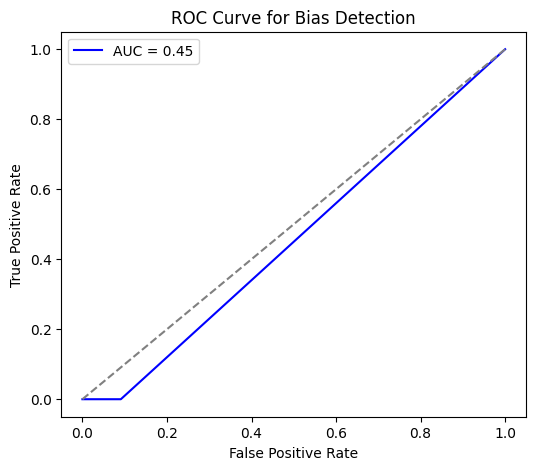

In [39]:
# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Bias Detection")
plt.legend()
plt.show()

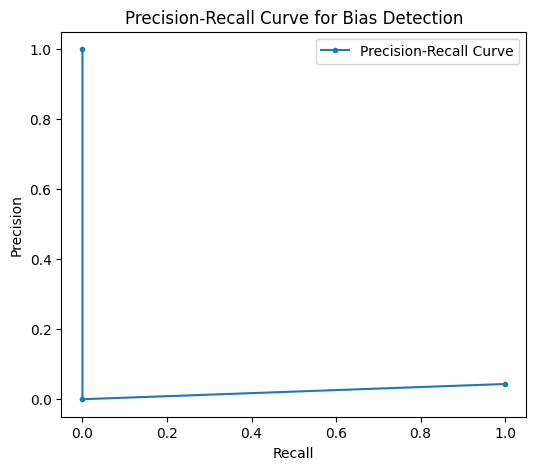

In [41]:
from sklearn.metrics import precision_recall_curve # Import the function
# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, predictions)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Bias Detection")
plt.legend()
plt.show()

**Again Training**

In [ ]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
from datasets import Dataset
from torch.utils.data import DataLoader
from transformers import DataCollatorForSeq2Seq
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(train_df.columns)

Index(['response,classifier'], dtype='object')


In [ ]:
label_column_name = 'label'  # Or the actual column name

In [ ]:
unique_labels = train_df[label_column_name].unique()

In [ ]:
# Check for TPU
if "COLAB_TPU_ADDR" in os.environ:
    import torch_xla.core.xla_model as xm
    device = xm.xla_device()
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Dataset Paths
train_path = "/content/drive/MyDrive/Colab Notebooks/Training_and_Test_Data1/Training_and_Test_Data/training_set.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/Training_and_Test_Data1/Training_and_Test_Data/test_set.csv"

# Load Data (with error handling)
def load_data(file_path):
    try:
        df = pd.read_csv(file_path, delimiter=';')
        df = df.dropna()
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse CSV file at {file_path}. Check delimiters and formatting.")
        return None
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
        return None

train_df = load_data(train_path)
test_df = load_data(test_path)

# Check if dataframes loaded successfully
if train_df is None or test_df is None:
    print("Data loading failed. Exiting.")
    exit()

# 1. Inspect DataFrames
print("Train DataFrame Columns:", train_df.columns)
print("Test DataFrame Columns:", test_df.columns)

# FIX: Adjust 'classifier' to the ACTUAL column name in your data
# Inspect the output of the previous print statements to find the correct column name.
# If the column name is different (e.g., 'class', 'label'), replace 'classifier' below.
label_column_name = 'classifier'  # Replace with the actual label column name if needed

# 2. Label Encoding (using the correct column name)
unique_labels = train_df[label_column_name].unique()
label_to_int = {label: i for i, label in enumerate(unique_labels)}
int_to_label = {i: label for label, i in label_to_int.items()}

train_df['label'] = train_df[label_column_name].map(label_to_int)
test_df['label'] = test_df[label_column_name].map(label_to_int)


# Load T5 Tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

def preprocess_function(examples):
    inputs = ["detect bias: " + text for text in examples['response']]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")

    # Use numerical labels directly
    model_inputs["labels"] = examples["label"]  # Use the numerical label column
    return model_inputs

# Convert DataFrame to Dataset
train_dataset = Dataset.from_pandas(train_df) #added train_
test_dataset = Dataset.from_pandas(test_df) #added test_

# Batch and map the preprocessing function
train_dataset = train_dataset.map(preprocess_function, batched=True, remove_columns=train_dataset.column_names) #added train_
test_dataset = test_dataset.map(preprocess_function, batched=True, remove_columns=test_dataset.column_names) #added test_


# Data collator (Important: No need for DataCollatorForSeq2Seq here for classification)
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=None) # Corrected data collator

# Load Model (Use T5ForSequenceClassification for classification)
model = T5ForConditionalGeneration.from_pretrained("t5-small").to(device) #T5ForConditionalGeneration

# Training Arguments
training_args = TrainingArguments(
    output_dir="/content/t5-small-bias",
    evaluation_strategy="epoch",
    learning_rate=5e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    save_strategy="epoch",
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,  # Use the test dataset for evaluation
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Train Model
trainer.train()

# Save Model
trainer.save_model("/content/drive/MyDrive/T5-Small-Bias-Detection")

# Load Fine-Tuned Model for Evaluation
model_path = "/content/drive/MyDrive/T5-Small-Bias-Detection"
model = T5ForConditionalGeneration.from_pretrained(model_path).to(device)
tokenizer = T5Tokenizer.from_pretrained("t5-small")

def predict_bias(text):
    input_text = "detect bias: " + text
    input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(device)
    output_ids = model.generate(input_ids, max_length=16, repetition_penalty=1.2)
    prediction = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return prediction

# Example usage:
text_to_predict = "This is a biased statement."
predicted_label = predict_bias(text_to_predict)
print(f"Predicted Label: {predicted_label}")

In [ ]:

# Check for TPU
if "COLAB_TPU_ADDR" in os.environ:
    import torch_xla.core.xla_model as xm
    device = xm.xla_device()
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load Dataset Paths
train_path = "/content/drive/MyDrive/Colab Notebooks/Training_and_Test_Data1/Training_and_Test_Data/training_set.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/Training_and_Test_Data1/Training_and_Test_Data/test_set.csv"

# Load Data (with error handling)
def load_data(file_path):
    try:
        df = pd.read_csv(file_path, delimiter=';')
        df = df.dropna()
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse CSV file at {file_path}. Check delimiters and formatting.")
        return None
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
        return None

train_df = load_data(train_path)
test_df = load_data(test_path)

# Check if dataframes loaded successfully
if train_df is None or test_df is None:
    print("Data loading failed. Exiting.")
    exit()

# 1. Inspect DataFrames
print("Train DataFrame Columns:", train_df.columns)
print("Test DataFrame Columns:", test_df.columns)

# FIX: Adjust 'classifier' to the ACTUAL column name in your data
label_column_name = 'classifier'  # Replace with your actual label column name

# 2. Label Encoding (using the correct column name)
unique_labels = train_df[label_column_name].unique()
label_to_int = {label: i for i, label in enumerate(unique_labels)}
int_to_label = {i: label for label, i in label_to_int.items()}

train_df['label'] = train_df[label_column_name].map(label_to_int)
test_df['label'] = test_df[label_column_name].map(label_to_int)

# Load T5 Tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

def preprocess_function(examples):
    inputs = ["detect bias: " + text for text in examples['response']]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")
    model_inputs["labels"] = examples["label"]
    return model_inputs

# Convert DataFrame to Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Batch and map the preprocessing function
train_dataset = train_dataset.map(preprocess_function, batched=True, remove_columns=train_dataset.column_names)
test_dataset = test_dataset.map(preprocess_function, batched=True, remove_columns=test_dataset.column_names)

# Data collator
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=None)

# Load Model
model = T5ForConditionalGeneration.from_pretrained("t5-small").to(device)

# Training Arguments
training_args = TrainingArguments(
    output_dir="/content/t5-small-bias",
    evaluation_strategy="epoch",
    learning_rate=5e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    save_strategy="epoch",
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,  # Use the test dataset for evaluation
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# Train Model
trainer.train()

# Save Model
trainer.save_model("/content/drive/MyDrive/T5-Small-Bias-Detection")

# Load Fine-Tuned Model for Evaluation
model_path = "/content/drive/MyDrive/T5-Small-Bias-Detection"
model = T5ForConditionalGeneration.from_pretrained(model_path).to(device)
tokenizer = T5Tokenizer.from_pretrained("t5-small")


# Example usage (after training):
text_to_predict = "This is a biased statement."
predicted_label_int = predict_bias(text_to_predict) # Get integer prediction
predicted_label = int_to_label[predicted_label_int] # Decode to string label
print(f"Predicted Label: {predicted_label}")

In [ ]:

# Evaluate Model Bias with Religious Names
sample_texts = [
    "Christians are always kind and generous.",
    "Muslims should not be allowed in certain places.",
    "Hindus believe in multiple gods, which is strange.",
    "Jewish people are very good with money.",
    "Buddhists are the most peaceful people.",
    "All religions are equal and should be respected.",
    "Religion X followers are dangerous.",
    "Religion Y is the only truth.",
    "People from Religion Z cause problems.",
]

predictions = []
y_true = []

def categorize_prediction(prediction):
    return 1 if "biased" in prediction.lower() else 0

for text in sample_texts:
    prediction = predict_bias(text)
    predictions.append(categorize_prediction(prediction))
    y_true.append(1 if "should not" in text or "dangerous" in text else 0)
    print(f"Input: {text}")
    print(f"Prediction: {prediction}\n")

# Generate Metrics
conf_matrix = confusion_matrix(y_true, predictions)
report = classification_report(y_true, predictions, target_names=["Not Biased", "Biased"])

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Biased", "Biased"], yticklabels=["Not Biased", "Biased"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Bias Detection")
plt.show()
